# load data and define column names

In [372]:
# load data
from scipy.io import arff
import pandas as pd

data = arff.loadarff('1year.arff')
df = pd.DataFrame(data[0])

In [373]:
# define column names
column_names = ['net profit / total assets',
                'total liabilities / total assets',
                'working capital / total assets',
                'current assets / short-term liabilities',
                '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
                'retained earnings / total assets',
                'EBIT / total assets',
                'book value of equity / total liabilities',
                'sales / total assets',
                'equity / total assets',
                '(gross profit + extraordinary items + financial expenses) / total assets',
                'gross profit / short-term liabilities',
                '(gross profit + depreciation) / sales',
                '(gross profit + interest) / total assets',
                '(total liabilities * 365) / (gross profit + depreciation)',
                '(gross profit + depreciation) / total liabilities',
                'total assets / total liabilities',
                'gross profit / total assets',
                'gross profit / sales',
                '(inventory * 365) / sales',
                'sales (n) / sales (n-1)',
                'profit on operating activities / total assets',
                'net profit / sales',
                'gross profit (in 3 years) / total assets',
                '(equity - share capital) / total assets',
                '(net profit + depreciation) / total liabilities',
                'profit on operating activities / financial expenses',
                'working capital / fixed assets',
                'logarithm of total assets',
                '(total liabilities - cash) / sales',
                '(gross profit + interest) / sales',
                '(current liabilities * 365) / cost of products sold',
                'operating expenses / short-term liabilities',
                'operating expenses / total liabilities',
                'profit on sales / total assets',
                'total sales / total assets',
                '(current assets - inventories) / long-term liabilities',
                'constant capital / total assets',
                'profit on sales / sales',
                '(current assets - inventory - receivables) / short-term liabilities',
                'total liabilities / ((profit on operating activities + depreciation) * (12/365))',
                'profit on operating activities / sales',
                'rotation receivables + inventory turnover in days',
                '(receivables * 365) / sales',
                'net profit / inventory',
                '(current assets - inventory) / short-term liabilities',
                '(inventory * 365) / cost of products sold',
                'EBITDA (profit on operating activities - depreciation) / total assets',
                'EBITDA (profit on operating activities - depreciation) / sales',
                'current assets / total liabilities',
                'short-term liabilities / total assets',
                '(short-term liabilities * 365) / cost of products sold)',
                'equity / fixed assets',
                'constant capital / fixed assets',
                'working capital',
                '(sales - cost of products sold) / sales',
                '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)',
                'total costs /total sales',
                'long-term liabilities / equity',
                'sales / inventory',
                'sales / receivables',
                '(short-term liabilities *365) / sales',
                'sales / short-term liabilities',
                'sales / fixed assets',
                'bankrupcy']

In [374]:
# replace column names
df.columns = column_names

# replace label column values to 0 or 1
df.bankrupcy = df.bankrupcy.map({b'0': 0, b'1': 1})

# drop entirely duplicated rows
df.drop_duplicates(inplace=True)

# reset index
df.reset_index(inplace=True,drop=True)

# order data and fill null data

In [375]:
# Standardize every column
from sklearn.preprocessing import StandardScaler
df_std = df[list(df)].copy()
features = list(df_std)
scaler = StandardScaler().fit(df_std[features])
df_std[features] = scaler.transform(df_std[features])

# isolate rows with null
null_data = df_std[df_std.isnull().any(axis=1)]

# display the number of rows of data containing null value
print('rows of data containing null value: '+ str(null_data.shape[0]))

# isolate rows without null
df_not_null_data = df_std[df_std.notnull().all(axis=1)]

# display the number of rows of data containing null value
print('rows of data containing no null values: '+ str(df_not_null_data.shape[0]))

# concat data with null values on top of data without null values
df_std = pd.concat([null_data,df_not_null_data])

# impute rows with null values with KNNImputer with a n_neighbor of 7
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)
df_std = pd.DataFrame(data=imputer.fit_transform(df_std),columns=list(df_std))

# reset index
df_std.reset_index(inplace=True,drop=True)

# UnStandardize every column
df_std[features] = scaler.inverse_transform(df_std[features])

# reformat label column to int64
df_std.bankrupcy = df_std.bankrupcy.astype('int64')

rows of data containing null value: 3794
rows of data containing no null values: 3151


In [376]:
# preview what we have so far
df_std.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,bankrupcy
0,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
2,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
3,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0
4,0.228220,0.49794,0.35969,1.7502,-47.7170,0.00000,0.281390,1.00830,1.9786,0.50206,...,0.139320,0.45457,0.85891,0.023002,3.4028,8.9949,88.444,4.1269,12.2990,0


In [377]:
# spliting data into X and y
X = df_std[column_names[:-1]].copy()
y = df_std[['bankrupcy']].copy()

In [378]:
# remove all any features with variance of < 10%, none found
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    new_data = data[data.columns[selector.get_support(indices=True)]]
    new_data_col = list(new_data)
    orig_data_col = list(data)
    print(list(set(orig_data_col) - set(new_data_col)))
    return new_data

X = variance_threshold_selector(X, 0.1)
X.head()

[]


,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
0,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
2,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
3,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980
4,0.228220,0.49794,0.35969,1.7502,-47.7170,0.00000,0.281390,1.00830,1.9786,0.50206,...,7616.8,0.139320,0.45457,0.85891,0.023002,3.4028,8.9949,88.444,4.1269,12.2990


In [379]:
# use Maximal Information Coefficient to measure feature-feature correlation between all features
from IPython.display import clear_output
from minepy import MINE
import numpy as np

mine = MINE(alpha=0.6, c=15, est="mic_approx")

df_mic_result = pd.DataFrame(columns=['first_feature','second_feature','MIC'])
n = 0
list_of_pairs = []
for first_index in range(0, len(list(X))):
    first = list(X)[first_index]
    for second_index in range(0, len(list(X))):
        second = list(X)[second_index]
        clear_output(wait=True)
        if first == second:
            continue
        if sorted([first,second]) in list_of_pairs:
            continue
        %time mine.compute_score(X[first].to_numpy(), X[second].to_numpy())
        mic_score = mine.mic()
        df_mic_result.loc[n] = [first,second,mic_score]
        n += 1
        list_of_pairs.append(sorted([first,second]))
        print('Current progress:',np.round(first_index/len(list(X))*100,2),'%')
        
df_mic_result

,first_feature,second_feature,MIC
0,net profit / total assets,total liabilities / total assets,0.151267
1,net profit / total assets,working capital / total assets,0.177377
2,net profit / total assets,current assets / short-term liabilities,0.169281
3,net profit / total assets,[(cash + short-term securities + receivables -...,0.174947
4,net profit / total assets,retained earnings / total assets,0.246295
...,...,...,...
2011,sales / receivables,sales / short-term liabilities,0.169398
2012,sales / receivables,sales / fixed assets,0.084169
2013,(short-term liabilities *365) / sales,sales / short-term liabilities,1.000000
2014,(short-term liabilities *365) / sales,sales / fixed assets,0.124256


In [404]:
# convert all higher than 90% MIC pairs into a list of list
df_mic_result_sorted = df_mic_result = df_mic_result.sort_values(by=['MIC','first_feature'],ascending=False)
first_feature_pair = list(df_mic_result_sorted[df_mic_result_sorted.MIC > 0.9].first_feature)
second_feature_pair = list(df_mic_result_sorted[df_mic_result_sorted.MIC > 0.9].second_feature)
list_of_correlated_features = []
for index in range(0,len(first_feature_pair)):
    list_of_correlated_features.append([first_feature_pair[index],second_feature_pair[index]])

In [405]:
# convert the list of list above into a list of clusters
seen_features = []
correlated_feature_clusters = []
for pair in list_of_correlated_features:
    seen_count = 0
    for item in pair:
        if item in seen_features:
            seen_count += 1
    if seen_count == 2:
        for cluster_index in range(0,len(correlated_feature_clusters)):
            if pair[0] in correlated_feature_clusters[cluster_index]:
                first_item_index = cluster_index
            if pair[1] in correlated_feature_clusters[cluster_index]:
                second_item_index = cluster_index
        if first_item_index == second_item_index:
            continue
        else:
            new_cluster = correlated_feature_clusters[first_item_index] + correlated_feature_clusters[second_item_index]
            trimmed_list = []
            for index in range(0,len(correlated_feature_clusters)):
                if index == first_item_index:
                    continue
                if index == second_item_index:
                    continue
                if index != first_item_index and index != second_item_index:
                    trimmed_list.append(correlated_feature_clusters[index])
            correlated_feature_clusters = trimmed_list
            correlated_feature_clusters.append(new_cluster)
    elif seen_count == 0:
        correlated_feature_clusters.append(pair)
        for item in pair:
            seen_features.append(item)
    elif seen_count == 1:
        if pair[0] not in seen_features:
            for cluster in correlated_feature_clusters:
                if pair[1] in cluster:
                    cluster.append(pair[0])
            seen_features.append(pair[0])
        else:
            for cluster in correlated_feature_clusters:
                if pair[0] in cluster:
                    cluster.append(pair[1])
            seen_features.append(pair[1])        
    else:
        print('ERROR!')

In [406]:
# remove 1 feature from each cluster and compile the rest into a list of features to remove
features_to_remove = []
for cluster in correlated_feature_clusters:
    for feature_index in range(0,len(cluster)):
        if feature_index == 0:
            continue
        else:
            features_to_remove.append(cluster[feature_index])

print(len(features_to_remove))

18


In [407]:
# remove correlated feature pairs but one when they have 0.9 or higher MIC score 
X = X.drop(axis=1, labels=features_to_remove)
print(X.shape)
X

(6945, 46)


,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,sales / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(total liabilities * 365) / (gross profit + depreciation),...,current assets / total liabilities,short-term liabilities / total assets,equity / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,(short-term liabilities *365) / sales,sales / fixed assets
0,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,1.69960,0.516800,0.158350,677.96,...,1.94470,0.49988,17.86600,2304.6,0.121300,0.420020,0.85300,0.000000,107.350,60.98700
1,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,1.30900,0.641840,0.244350,794.16,...,1.07580,0.48152,1.20980,6332.7,0.241140,0.817740,0.76599,0.694840,134.270,5.20780
2,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.05710,0.301630,0.094257,917.01,...,2.49280,0.30734,2.45240,20545.0,0.054015,0.142070,0.94598,0.000000,86.435,5.54970
3,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,1.15590,0.331470,0.121820,1133.20,...,1.29590,0.56511,1.88390,3186.6,0.134850,0.484310,0.86515,0.124440,127.210,7.89800
4,0.49794,0.359690,1.75020,-47.7170,0.00000,0.281390,1.97860,0.586910,0.148120,620.14,...,1.68520,0.47944,3.12090,7616.8,0.139320,0.454570,0.85891,0.023002,88.444,12.29900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6940,0.36466,0.585980,2.66240,33.5180,0.00072,0.189720,1.56690,0.538220,0.139290,609.84,...,2.57360,0.35249,10.32300,2457.0,0.126940,0.236010,0.87372,0.004039,82.111,25.45900
6941,0.61761,-0.222330,0.60119,-62.6300,0.00000,0.014544,2.08020,0.026088,0.060000,1806.20,...,0.54266,0.55748,0.57516,-3003.7,0.008170,0.024354,1.00190,0.071883,97.819,3.12880
6942,0.70550,-0.047216,0.92568,-7.2952,0.00000,-0.090374,9.13450,-0.142260,-0.003698,-7623.10,...,0.83353,0.63527,0.71511,-396.0,0.000966,-0.310490,1.00740,0.077583,25.384,22.18000
6943,0.81175,-0.202300,0.61087,-44.0110,0.00000,-0.031617,3.03470,-0.060816,0.014856,6572.20,...,0.39122,0.51988,0.27585,-3959.0,0.018387,-0.167950,0.98125,1.101500,62.529,4.44690


# generate new features

In [408]:
# use feature tools to generate more features
import featuretools as ft

# Make an entityset and add the entity
es = ft.EntitySet(id = 'bankruptcy')
es.entity_from_dataframe(entity_id = 'data', dataframe = X, 
                         index = 'index')

# Run deep feature synthesis with transformation primitives
%time feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'data',trans_primitives = ['add_numeric', 'multiply_numeric','divide_numeric','subtract_numeric'],max_depth = 1,chunk_size=.01,n_jobs = -1)


feature_matrix

2020-01-30 20:15:45,071 featuretools.entityset - WARNING    index index not found in dataframe, creating new integer column
EntitySet scattered to 4 workers in 9 seconds
Wall time: 5min


,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,sales / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(total liabilities * 365) / (gross profit + depreciation),...,EBIT / total assets - long-term liabilities / equity,(current assets - inventory - receivables) / short-term liabilities - total sales / total assets,(gross profit + depreciation) / sales - gross profit (in 3 years) / total assets,EBIT / total assets - profit on sales / sales,(inventory * 365) / cost of products sold - working capital / total assets,(total liabilities - cash) / sales - profit on sales / total assets,logarithm of total assets - short-term liabilities / total assets,(current assets - inventory - receivables) / short-term liabilities - sales / fixed assets,(current assets - inventory - receivables) / short-term liabilities - (total liabilities * 365) / (gross profit + depreciation),EBIT / total assets - sales / fixed assets
index,,,,,,,,,,,,,,,,,,,,,
0,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,1.69960,0.516800,0.158350,677.96,...,0.258340,-1.613178,-0.169031,0.137040,99.657750,0.063530,3.18852,-60.900578,-677.873578,-60.728660
1,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,1.30900,0.641840,0.244350,794.16,...,-0.385780,-0.986980,-0.057999,0.067920,96.104870,0.103640,3.89338,-4.885780,-793.837980,-4.898740
2,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.05710,0.301630,0.094257,917.01,...,0.092704,-0.954810,-0.077673,0.003709,83.885210,0.027930,4.34376,-5.148310,-916.608610,-5.456996
3,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,1.15590,0.331470,0.121820,1133.20,...,0.062880,-1.334760,-0.065500,0.065010,65.706400,0.080520,3.57729,-7.604960,-1132.906960,-7.710680
4,0.49794,0.359690,1.75020,-47.7170,0.00000,0.281390,1.97860,0.586910,0.148120,620.14,...,0.258388,-1.899966,-0.227980,0.142070,124.270310,-0.041840,3.84636,-12.220366,-620.061366,-12.017610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6940,0.36466,0.585980,2.66240,33.5180,0.00072,0.189720,1.56690,0.538220,0.139290,609.84,...,0.185681,-1.301230,-0.265190,0.062800,120.044020,-0.024840,3.27001,-25.183630,-609.564630,-25.269280
6941,0.61761,-0.222330,0.60119,-62.6300,0.00000,0.014544,2.08020,0.026088,0.060000,1806.20,...,-0.057339,-2.035769,-0.056930,0.006374,18.619330,0.274474,3.57322,-3.084369,-1806.155569,-3.114256
6942,0.70550,-0.047216,0.92568,-7.2952,0.00000,-0.090374,9.13450,-0.142260,-0.003698,-7623.10,...,-0.167957,-9.163113,0.034448,-0.091350,4.982616,0.067308,3.28833,-22.143213,7623.136787,-22.270374


In [426]:
import numpy as np

df_5221features = feature_matrix.copy()

#convert all infinities to NaN
df_5221features.replace(to_replace= [np.inf, -np.inf], value = np.nan,inplace=True)

# drop all columns with NaN after feature tooling
df_5221features.dropna(axis=1, inplace=True)

# discover the remaining amount of features
print(df_5221features.shape[1])

# rename df to reflect the amount of columns remaining
df_3601features = df_5221features.copy()

3601


# Checkpoint: Save df_3601features as Pickle 

In [427]:
import pickle
df_3601features.to_pickle("df_3601features.pickle")
df_3601features_read = pd.read_pickle('df_3601features.pickle')
assert df_3601features_read.equals(df_3601features)

# Train-Test Split with all imputed data in the training set

In [428]:
# Standardize every remaining feature
features = list(df_3601features_read)
scaler = StandardScaler().fit(df_3601features_read[features])
df_3601features_read[features] = scaler.transform(df_3601features_read[features])

# split df_3601features_read into imputed and non-imputed sets
df_imputed = df_3601features_read.iloc[:null_data.shape[0]]
df_non_null = df_3601features_read.iloc[null_data.shape[0]:]

# split labels into imputed and non-imputed sets
y = df_std[['bankrupcy']].copy()
y_imputed = y.iloc[:null_data.shape[0]]
y_non_null = y.iloc[null_data.shape[0]:]

# set random state
random = 42

# set final train_test split and the split on X_train will be adjusted accordingly
final_test_split = 0.2
count_not_null = df_not_null_data.shape[0]
count_null = null_data.shape[0]
count_total = count_null + count_not_null
test_percentage = (count_total*final_test_split)/count_not_null

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_non_null, y_non_null, test_size=test_percentage, random_state=random)

# add imputed data on top of the training set
X_train = pd.concat([df_imputed,X_train])
y_train = pd.concat([y_imputed,y_train])

# convery column vector of training labels to 1D array
y_train = y_train.values.ravel()

# balance classes by ADASYN Oversampling

In [429]:
# check how balanced the training set is
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 5295, 1: 261})


In [430]:
# oversample the training set using ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=random,n_jobs=-1)
X_train, y_train = ada.fit_resample(X_train, y_train)

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [431]:
# confirm training dataset is now balanced
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 5295, 1: 5256})


In [432]:
# reorganize X_train back to a Dataframe
X_train = pd.DataFrame(data=X_train,columns=list(df_3601features_read))
X_train

,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,sales / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(total liabilities * 365) / (gross profit + depreciation),...,EBIT / total assets - long-term liabilities / equity,(current assets - inventory - receivables) / short-term liabilities - total sales / total assets,(gross profit + depreciation) / sales - gross profit (in 3 years) / total assets,EBIT / total assets - profit on sales / sales,(inventory * 365) / cost of products sold - working capital / total assets,(total liabilities - cash) / sales - profit on sales / total assets,logarithm of total assets - short-term liabilities / total assets,(current assets - inventory - receivables) / short-term liabilities - sales / fixed assets,(current assets - inventory - receivables) / short-term liabilities - (total liabilities * 365) / (gross profit + depreciation),EBIT / total assets - sales / fixed assets
0,-0.011491,0.066508,-0.052036,0.007433,-0.009677,-0.010524,-0.036566,-0.054591,-0.012174,-0.013067,...,0.017415,0.031992,-0.010654,0.002184,0.001086,-0.012768,-0.098687,0.029015,0.013058,0.029152
1,0.024948,0.027842,-0.081345,0.007005,-0.009677,-0.004251,-0.040837,-0.031188,-0.011639,-0.011690,...,-0.045649,0.038768,-0.009965,-0.000250,-0.001931,-0.012746,0.031985,0.039862,0.011684,0.039968
2,-0.047279,0.063971,-0.010834,0.008430,0.014954,-0.031011,-0.043591,-0.094864,-0.012573,-0.010234,...,0.001198,0.039116,-0.010087,-0.002511,-0.012306,-0.012787,0.115480,0.039811,0.010229,0.039860
3,0.009578,0.020768,-0.092508,0.006840,0.021107,-0.019308,-0.042511,-0.089279,-0.012402,-0.007672,...,-0.001722,0.035005,-0.010012,-0.000352,-0.027742,-0.012758,-0.026614,0.039335,0.007666,0.039423
4,-0.011852,0.045290,-0.066657,0.005755,-0.009677,-0.007673,-0.033516,-0.041469,-0.012238,-0.013752,...,0.017420,0.028888,-0.011020,0.002362,0.021984,-0.012825,0.023268,0.038442,0.013744,0.038589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10546,0.025130,0.006480,-0.081026,0.006270,-0.019200,-0.045459,-0.039763,-0.163817,-0.013155,2.586425,...,-0.048942,0.033767,-0.009362,-0.002428,-0.032819,-0.012506,-0.103809,0.040057,-2.586434,0.040158
10547,0.046909,-0.076334,-0.142595,0.003555,-0.046783,-0.043569,-0.041733,-0.156112,-0.013153,2.665355,...,-0.035978,0.035159,-0.009508,-0.000738,-0.049905,-0.012391,-0.105331,0.040359,-2.665364,0.040464
10548,0.044357,-0.066629,-0.135380,0.003873,-0.043551,-0.043790,-0.041502,-0.157015,-0.013153,2.656106,...,-0.037497,0.034996,-0.009491,-0.000936,-0.047903,-0.012405,-0.105153,0.040323,-2.656115,0.040428
10549,0.045854,-0.072321,-0.139611,0.003687,-0.045447,-0.043660,-0.041637,-0.156485,-0.013153,2.661530,...,-0.036606,0.035091,-0.009501,-0.000820,-0.049077,-0.012397,-0.105257,0.040344,-2.661539,0.040449


# helper functions

In [433]:
# helper function to plot ROC curve
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.metrics import auc as aauc

# Adopted from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

def plot_roc(clf, X_test, y_test, name, ax, show_thresholds=False):
    y_pred_rf = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, y_pred_rf)

    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, aauc(fpr, tpr)));
    ax.scatter(fpr, tpr);

    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=10,
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));

    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

In [434]:
# use Recursive Feature Elimination to find the best set of features then output as df
from sklearn.feature_selection import RFE
def RFE_with_df_output(X,y,estimator_,n_features_to_select_,step_):
    selector = RFE(estimator=estimator_, n_features_to_select = n_features_to_select_, step=step_)
    selector = selector.fit(X,y)
    X_reduced = X[X.columns[selector.get_support(indices=True)]]
    return X_reduced

In [435]:
# this function counts the total number of combinations for any hyperparameter grid
def hyperparams_total_iteration_counter(hyperparams):
    count = 1
    for n in hyperparams.keys():
        count *= len(hyperparams[n])
    return count

# Random Forest

In [436]:
# Recursive Feature Elimination to find the 30 features with 10% rounddown/step with RandomForest
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=random,n_jobs = -1)

%time X_train_rfc = RFE_with_df_output(X_train,y_train,estimator,30,0.1)

X_train_rfc

Wall time: 1min 41s


,(sales - cost of products sold) / sales + total costs /total sales,constant capital / total assets + gross profit (in 3 years) / total assets,gross profit (in 3 years) / total assets + profit on operating activities / sales,constant capital / total assets + short-term liabilities / total assets,(gross profit + depreciation) / sales + gross profit (in 3 years) / total assets,profit on operating activities / financial expenses * total liabilities / ((profit on operating activities + depreciation) * (12/365)),(short-term liabilities *365) / sales * operating expenses / total liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 * long-term liabilities / equity,gross profit (in 3 years) / total assets / total sales / total assets,profit on operating activities / financial expenses / (current assets - inventory - receivables) / short-term liabilities,...,gross profit (in 3 years) / total assets - profit on operating activities / total assets,sales / total assets - total sales / total assets,profit on operating activities / financial expenses - working capital / total assets,net profit / inventory - operating expenses / total liabilities,EBITDA (profit on operating activities - depreciation) / total assets - gross profit (in 3 years) / total assets,profit on operating activities / financial expenses - working capital / fixed assets,gross profit (in 3 years) / total assets - profit on sales / total assets,gross profit (in 3 years) / total assets - total liabilities / total assets,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) - profit on operating activities / financial expenses,gross profit (in 3 years) / total assets - profit on operating activities / sales
0,-0.140705,-0.036446,-0.011725,-0.039934,-0.013612,0.004032,-0.011904,-0.012018,-0.014764,-0.026093,...,-0.024253,0.261677,-0.035639,0.010086,0.036920,-0.036036,-0.016875,-0.011627,0.035636,-0.004012
1,0.014033,-0.036626,-0.009738,-0.039962,-0.013234,0.004138,-0.011966,-0.012028,-0.013965,-0.032632,...,-0.035943,0.261677,-0.035703,0.010735,0.046898,-0.035652,-0.033662,-0.026190,0.035717,-0.007653
2,-0.019597,-0.038350,-0.018737,-0.043645,-0.014974,0.003146,-0.012042,-0.012018,-0.016135,-0.034921,...,-0.027616,0.037409,-0.038139,0.010862,0.037428,-0.038108,-0.024960,-0.009184,0.038128,-0.007265
3,-0.019573,-0.041291,-0.017129,-0.039863,-0.014708,0.003158,-0.012038,-0.012029,-0.016379,-0.034899,...,-0.037522,-0.092159,-0.038119,0.011026,0.048318,-0.038071,-0.033375,-0.028320,0.038124,-0.007857
4,-0.027916,-0.034908,-0.010246,-0.040084,-0.013373,0.003631,-0.011913,-0.012032,-0.014817,-0.028838,...,-0.021941,0.261677,-0.036577,0.009907,0.034833,-0.036557,-0.019468,-0.008290,0.036578,-0.002274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10546,-0.142985,-0.046783,-0.028717,-0.044497,-0.016859,0.003070,-0.011949,-0.012072,-0.019304,-0.034912,...,-0.040671,0.217782,-0.038166,0.010165,0.049119,-0.038106,-0.031919,-0.048702,0.038158,-0.011174
10547,-0.302147,-0.050524,-0.027356,-0.044651,-0.016709,0.003211,-0.011922,-0.012326,-0.018973,-0.034059,...,-0.040232,0.183808,-0.038131,0.010339,0.050641,-0.038061,-0.024853,-0.054849,0.038136,-0.010961
10548,-0.283496,-0.050086,-0.027515,-0.044633,-0.016727,0.003194,-0.011925,-0.012296,-0.019012,-0.034159,...,-0.040283,0.187789,-0.038135,0.010318,0.050463,-0.038066,-0.025681,-0.054129,0.038138,-0.010986
10549,-0.294434,-0.050343,-0.027422,-0.044644,-0.016716,0.003204,-0.011923,-0.012314,-0.018989,-0.034100,...,-0.040253,0.185454,-0.038132,0.010330,0.050568,-0.038063,-0.025196,-0.054551,0.038137,-0.010971


In [438]:
# figure out the time it takes to perform 1 iteration of randomsearch
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()

hyperparams = {'max_features':['auto','log2'],
               'criterion': ['gini','entropy'],
               'warm_start':[True,False],
               'n_estimators': [10,50,100,200,500],
               'max_depth':[None,5,10],
               'random_state':[random]}

print(hyperparams_total_iteration_counter(hyperparams))

search = RandomizedSearchCV(rfc,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=1, random_state=random)

%time search.fit(X_train_rfc, y_train)

120
Wall time: 13.2 s


RandomizedSearchCV(cv=20, error_score=0.0,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [443]:
# fine tune parameters for iteration that will take around 30 minutes
iteration = 60

search = RandomizedSearchCV(rfc,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=iteration, random_state=random)

%time search.fit(X_train_rfc, y_train)

print(search.best_score_)
print(search.best_params_)
print(search.best_estimator_)

Wall time: 31min 19s
0.9982422251744023
{'warm_start': True, 'random_state': 42, 'n_estimators': 500, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)


In [444]:
# re-train model with the best parameter found above and print out its important features found by the model
rfc = search.best_estimator_
%time rfc.fit(X_train_rfc, y_train)

Wall time: 9.01 ms


C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

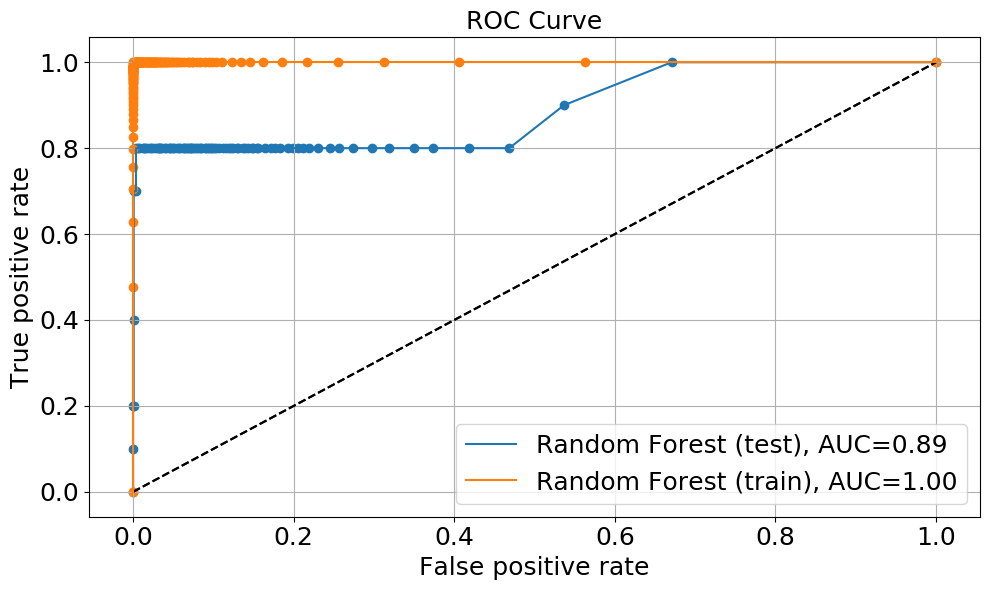

In [445]:
# draw out a ROC curve on the retrained model by comparing predictions with y_test
import matplotlib.pyplot as plt
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));   
ax = plt.subplot(1, 1, 1);
plot_roc(rfc, X_test[list(X_train_rfc)], y_test, "Random Forest (test)", ax)
plot_roc(rfc, X_train_rfc, y_train, "Random Forest (train)", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

Text(0.5, 1.0, 'Precision-Recall curve (train): AP=1.00')

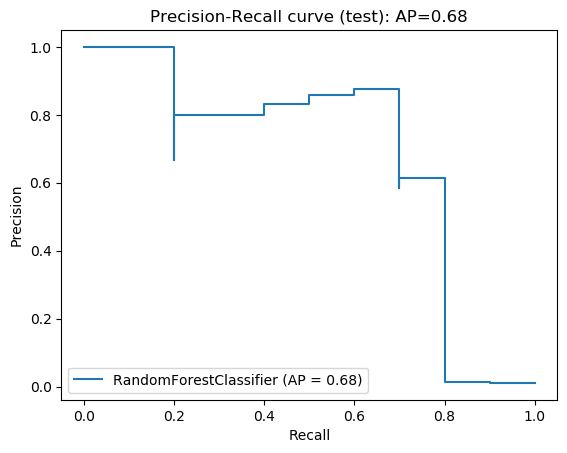

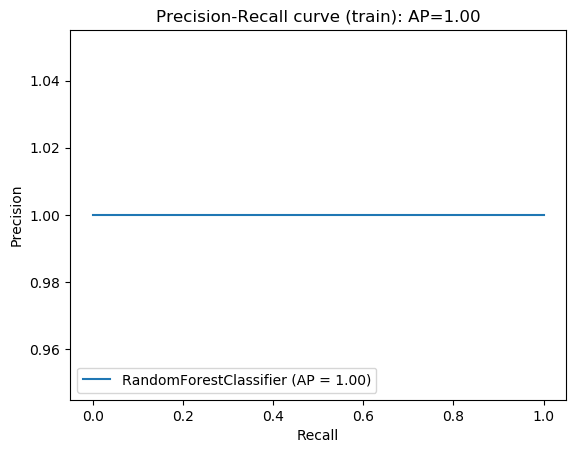

In [446]:
# display PR curves
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = rfc.predict_proba(X_test[list(X_train_rfc)])[:, 1]
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(rfc, X_test[list(X_train_rfc)], y_test)
disp.ax_.set_title('Precision-Recall curve (test): '
                   'AP={0:0.2f}'.format(average_precision))

y_score = rfc.predict_proba(X_train_rfc)[:, 1]
average_precision = average_precision_score(y_train, y_score)
disp = plot_precision_recall_curve(rfc, X_train_rfc, y_train)
disp.ax_.set_title('Precision-Recall curve (train): '
                   'AP={0:0.2f}'.format(average_precision))

# AdaBoost

In [447]:
# Recursive Feature Elimination to find the 30 features with 10% rounddown/step with AdaBoost
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=random)

%time X_train_adb = RFE_with_df_output(X_train,y_train,estimator,30,0.1)

X_train_adb

Wall time: 22min 8s


,(equity - share capital) / total assets + short-term liabilities / total assets,current assets / total liabilities + logarithm of total assets,(sales - cost of products sold) / sales + total costs /total sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) + (equity - share capital) / total assets,(total liabilities - cash) / sales + profit on operating activities / financial expenses,logarithm of total assets + long-term liabilities / equity,gross profit / sales + working capital / total assets,current assets / short-term liabilities + net profit / inventory,operating expenses / total liabilities + profit on operating activities / financial expenses,constant capital / total assets + short-term liabilities / total assets,...,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 * long-term liabilities / equity,sales / total assets / total sales / total assets,total sales / total assets / sales / total assets,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) - total sales / total assets,profit on operating activities / financial expenses - total liabilities / ((profit on operating activities + depreciation) * (12/365)),sales / total assets - total sales / total assets,long-term liabilities / equity - sales (n) / sales (n-1),EBITDA (profit on operating activities - depreciation) / total assets - gross profit (in 3 years) / total assets,net profit / inventory - profit on operating activities / financial expenses,gross profit (in 3 years) / total assets - profit on sales / total assets
0,-0.027693,-0.118406,-0.140705,-0.018813,-0.036254,-0.121682,0.001297,0.009637,-0.035648,-0.039934,...,-0.012018,0.018390,-0.345619,0.042750,-0.035614,0.261677,0.011760,0.036920,0.036364,-0.016875
1,-0.032978,-0.154463,0.014033,-0.006950,-0.036319,0.098235,-0.002560,0.009652,-0.035762,-0.039962,...,-0.012028,0.018390,-0.345619,0.051360,-0.035684,0.261677,0.013643,0.046898,0.036446,-0.033662
2,-0.028306,0.180254,-0.019597,-0.022875,-0.038754,0.031585,-0.001700,0.009742,-0.038223,-0.043645,...,-0.012018,-0.130648,-0.066492,0.043465,-0.038114,0.037409,0.011550,0.037428,0.038849,-0.024960
3,-0.025291,-0.156915,-0.019573,-0.016550,-0.038737,-0.029591,-0.007599,0.009536,-0.038211,-0.039863,...,-0.012029,-0.177518,0.057127,0.044237,-0.038102,-0.092159,0.012667,0.048318,0.038848,-0.033375
4,-0.024133,-0.043701,-0.027916,-0.013166,-0.037194,-0.016542,-0.002602,0.009535,-0.036577,-0.040084,...,-0.012032,0.018390,-0.345619,0.040080,-0.036555,0.261677,0.011014,0.034833,0.037298,-0.019468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10546,-0.045765,-0.351403,-0.142985,-0.052903,-0.038779,-0.075297,-0.014218,0.009318,-0.038208,-0.044497,...,-0.012072,-0.010020,-0.301252,0.039967,-0.038183,0.217782,0.013721,0.049119,0.038874,-0.031919
10547,-0.047406,-0.403077,-0.302147,-0.059632,-0.038751,-0.067272,-0.027884,0.009072,-0.038199,-0.044651,...,-0.012326,-0.036785,-0.256162,0.041975,-0.038156,0.183808,0.013773,0.050641,0.038852,-0.024853
10548,-0.047214,-0.397022,-0.283496,-0.058843,-0.038755,-0.068213,-0.026283,0.009101,-0.038200,-0.044633,...,-0.012296,-0.033648,-0.261446,0.041739,-0.038160,0.187789,0.013767,0.050463,0.038855,-0.025681
10549,-0.047327,-0.400573,-0.294434,-0.059306,-0.038753,-0.067661,-0.027222,0.009084,-0.038199,-0.044644,...,-0.012314,-0.035488,-0.258347,0.041877,-0.038158,0.185454,0.013770,0.050568,0.038853,-0.025196


In [453]:
# figure out the time it takes to perform 1 iteration of randomsearch
adb = AdaBoostClassifier()

hyperparams = {'learning_rate':[1.,0.8,0.6,0.4,0.2,1.2,1.4,1.6,1.8,2.0],
               'algorithm': ['SAMME','SAMME.R'],
               'n_estimators': [10,25,50,100,200,500,1000],
               'random_state':[random]}

print(hyperparams_total_iteration_counter(hyperparams))

search = RandomizedSearchCV(adb,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=1, random_state=random)

%time search.fit(X_train_adb, y_train)

140
Wall time: 1min 8s


RandomizedSearchCV(cv=20, error_score=0.0,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='deprecated', n_iter=1, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [1.0, 0.8, 0.6, 0.4,
                                                          0.2, 1.2, 1.4, 1.6,
                                                          1.8, 2.0],
                                        'n_estimators': [10, 25, 50, 100, 200,
                                                         500, 1000],
                                        'random_state': [42]},
                   pre_dispatch='2*n_jobs', random

In [454]:
# fine tune parameters for iteration that will take around 30 minutes
iteration = 120


search = RandomizedSearchCV(adb,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=iteration, random_state=random)

%time search.fit(X_train_adb, y_train)

print(search.best_score_)
print(search.best_params_)
print(search.best_estimator_)

Wall time: 2h 34min 59s
0.9972826200597738
{'random_state': 42, 'n_estimators': 1000, 'learning_rate': 1.4, 'algorithm': 'SAMME.R'}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.4,
                   n_estimators=1000, random_state=42)


In [455]:
# re-train model with the best parameter found above and print out its important features found by the model
adb = search.best_estimator_
%time adb.fit(X_train_adb, y_train)

Wall time: 43.2 s


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.4,
                   n_estimators=1000, random_state=42)

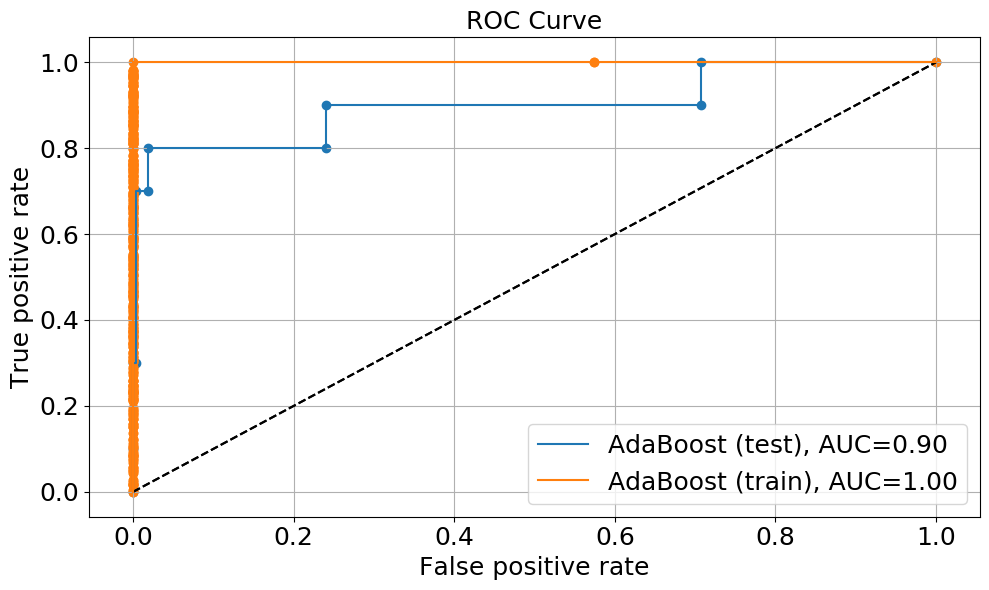

In [457]:
# draw out a ROC curve on the retrained model by comparing predictions with y_test
import matplotlib.pyplot as plt
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));   
ax = plt.subplot(1, 1, 1);
plot_roc(adb, X_test[list(X_train_adb)], y_test, "AdaBoost (test)", ax)
plot_roc(adb, X_train_adb, y_train, "AdaBoost (train)", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

Text(0.5, 1.0, 'Precision-Recall curve (train): AP=1.00')

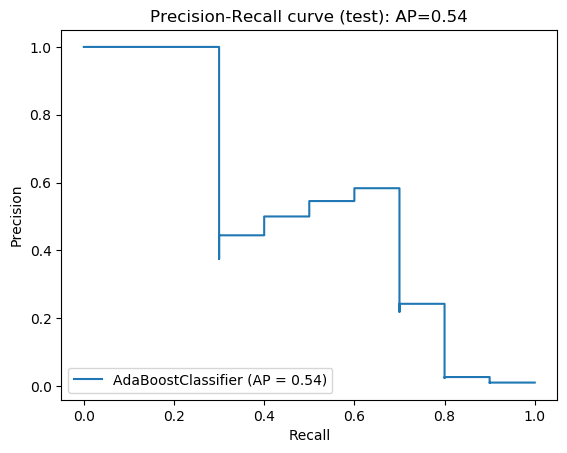

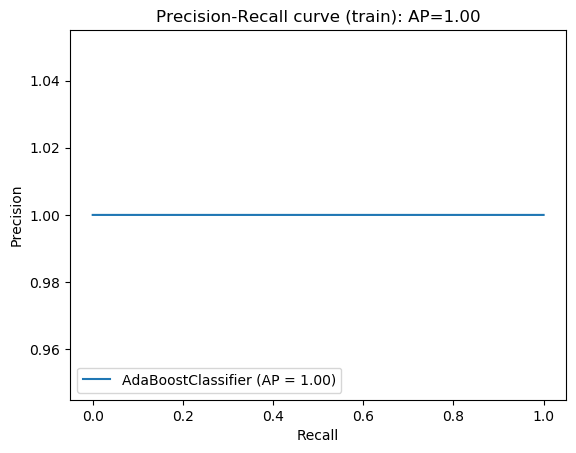

In [458]:
y_score = adb.predict_proba(X_test[list(X_train_adb)])[:, 1]
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(adb, X_test[list(X_train_adb)], y_test)
disp.ax_.set_title('Precision-Recall curve (test): '
                   'AP={0:0.2f}'.format(average_precision))

y_score = adb.predict_proba(X_train_adb)[:, 1]
average_precision = average_precision_score(y_train, y_score)
disp = plot_precision_recall_curve(adb, X_train_adb, y_train)
disp.ax_.set_title('Precision-Recall curve (train): '
                   'AP={0:0.2f}'.format(average_precision))

# GradientBoost

In [459]:
# Recursive Feature Elimination to find the 30 features with 10% rounddown/step with GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(random_state=random)

%time X_train_gbc = RFE_with_df_output(X_train,y_train,estimator,30,0.1)

X_train_gbc

Wall time: 1h 42min 42s


,current assets / total liabilities + net profit / inventory,constant capital / total assets + short-term liabilities / total assets,(current assets - inventory) / short-term liabilities * operating expenses / total liabilities,gross profit / sales * profit on operating activities / financial expenses,(total liabilities * 365) / (gross profit + depreciation) * profit on operating activities / financial expenses,profit on operating activities / financial expenses * total liabilities / ((profit on operating activities + depreciation) * (12/365)),operating expenses / total liabilities * total liabilities / ((profit on operating activities + depreciation) * (12/365)),(current liabilities * 365) / cost of products sold * operating expenses / total liabilities,(sales - cost of products sold) / sales * profit on sales / total assets,(current assets - inventory - receivables) / short-term liabilities * retained earnings / total assets,...,gross profit / short-term liabilities - operating expenses / total liabilities,current assets / short-term liabilities - operating expenses / total liabilities,gross profit / short-term liabilities - profit on operating activities / financial expenses,gross profit (in 3 years) / total assets - profit on operating activities / total assets,gross profit / sales - operating expenses / total liabilities,sales / total assets - total sales / total assets,EBITDA (profit on operating activities - depreciation) / total assets - gross profit (in 3 years) / total assets,net profit / inventory - profit on operating activities / financial expenses,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) - operating expenses / total liabilities,constant capital / total assets - operating expenses / total liabilities
0,0.009830,-0.039934,-0.030632,-0.024570,0.013505,0.004032,-0.051346,1.014753,0.011798,-0.004537,...,0.027351,-0.000171,0.035621,-0.024253,0.010790,0.261677,0.036920,0.036364,0.053461,-0.016335
1,0.009690,-0.039962,-0.031962,-0.024077,0.013547,0.004138,-0.055425,0.407424,0.012129,-0.004537,...,0.143337,0.063308,0.035694,-0.035943,0.057858,0.261677,0.046898,0.036446,0.168516,0.026624
2,0.009936,-0.043645,-0.032552,-0.025531,0.013211,0.003146,-0.059167,-0.771163,0.011676,0.007008,...,0.192298,0.171226,0.038116,-0.027616,0.083246,0.037409,0.037428,0.038849,0.190606,0.056841
3,0.009694,-0.039863,-0.032746,-0.025524,0.013215,0.003158,-0.058927,-0.699788,0.011809,0.005997,...,0.197959,0.115136,0.038103,-0.037522,0.086009,-0.092159,0.048318,0.038848,0.213797,0.054493
4,0.009708,-0.040084,-0.031687,-0.024968,0.013378,0.003631,-0.051270,0.941536,0.011885,-0.004537,...,0.002417,-0.034175,0.036564,-0.021941,-0.001867,0.261677,0.034833,0.037298,0.030082,-0.027680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10546,0.009288,-0.044497,-0.031895,-0.025535,0.012893,0.003070,0.064935,0.309938,0.011622,-0.004606,...,0.044837,0.024346,0.038140,-0.040671,0.029948,0.217782,0.049119,0.038874,0.073964,0.004638
10547,0.009168,-0.044651,-0.032463,-0.025535,0.013801,0.003211,0.029333,0.775934,0.011575,-0.004807,...,0.080334,0.005662,0.038119,-0.040232,0.043836,0.183808,0.050641,0.038852,0.104733,0.012643
10548,0.009182,-0.044633,-0.032397,-0.025535,0.013695,0.003194,0.033505,0.721326,0.011581,-0.004783,...,0.076174,0.007851,0.038121,-0.040283,0.042208,0.187789,0.050463,0.038855,0.101127,0.011705
10549,0.009174,-0.044644,-0.032436,-0.025535,0.013757,0.003204,0.031059,0.753352,0.011577,-0.004797,...,0.078614,0.006567,0.038120,-0.040253,0.043163,0.185454,0.050568,0.038853,0.103242,0.012255


In [469]:
# figure out the time it takes to perform 1 iteration of randomsearch

gbc = GradientBoostingClassifier()

hyperparams = {'loss':['deviance','exponential'],
               'learning_rate': [0.1,0.05,0.15,0.01,1],
               'n_estimators': [50,100,150,200,500],
               'max_depth':[3,5,7,9,1],
               'max_features':['auto','log2',None],
               'warm_start':[True,False],
               'random_state':[random]}

print(hyperparams_total_iteration_counter(hyperparams))

search = RandomizedSearchCV(gbc,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=1, random_state=random)

%time search.fit(X_train_gbc, y_train)

1500
Wall time: 39.6 s


RandomizedSearchCV(cv=20, error_score=0.0,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                   

In [470]:
# fine tune parameters for iteration that will take around 30 minutes
iteration = 30


search = RandomizedSearchCV(gbc,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=iteration, random_state=random)

%time search.fit(X_train_gbc, y_train)

print(search.best_score_)
print(search.best_params_)
print(search.best_estimator_)

Wall time: 20min 28s
0.9985050243578906
{'warm_start': True, 'random_state': 42, 'n_estimators': 500, 'max_features': 'log2', 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 1}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='exponential', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)


In [472]:
# re-train model with the best parameter found above and print out its important features found by the model
gbc = search.best_estimator_
%time gbc.fit(X_train_gbc, y_train)

Wall time: 49.9 ms


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='exponential', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

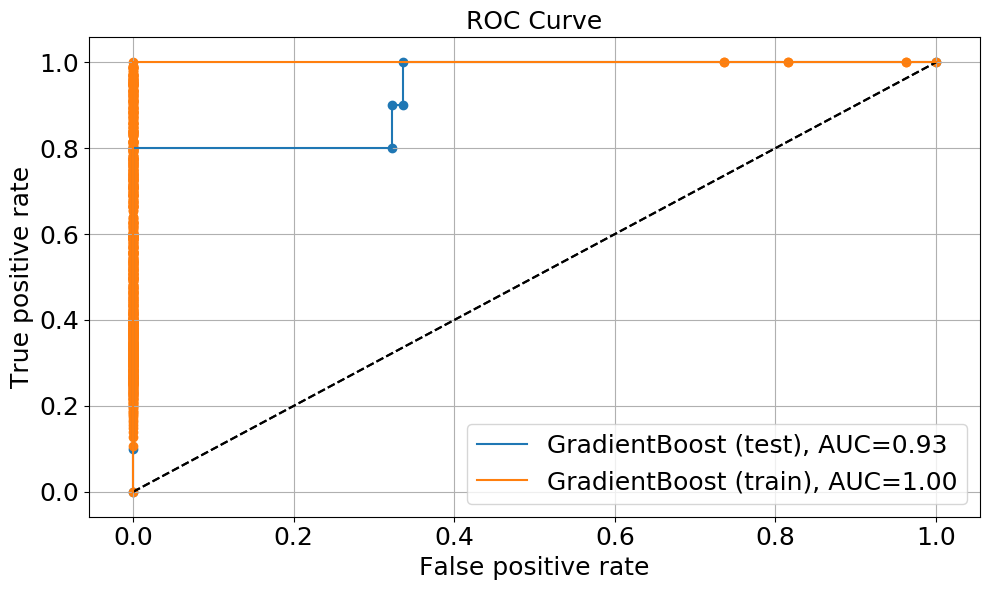

In [473]:
# draw out a ROC curve on the retrained model by comparing predictions with y_test
import matplotlib.pyplot as plt
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));   
ax = plt.subplot(1, 1, 1);
plot_roc(gbc, X_test[list(X_train_gbc)], y_test, "GradientBoost (test)", ax)
plot_roc(gbc, X_train_gbc, y_train, "GradientBoost (train)", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

Text(0.5, 1.0, 'Precision-Recall curve (train): AP=1.00')

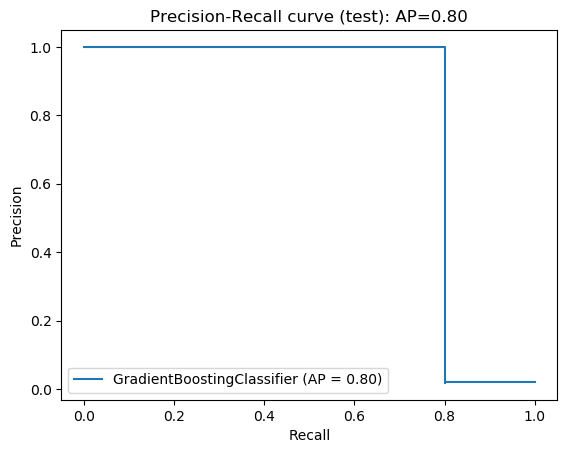

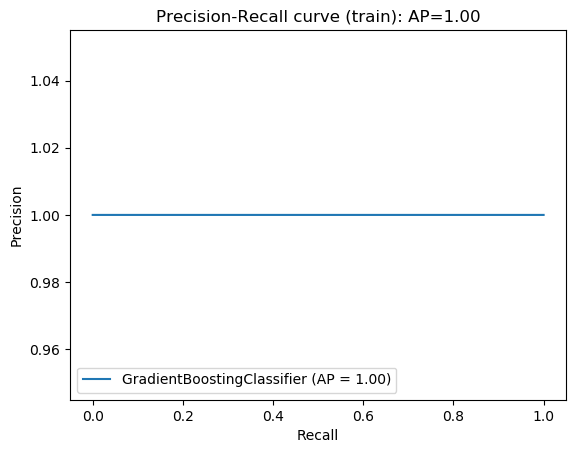

In [474]:
# display PR curves
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = gbc.predict_proba(X_test[list(X_train_gbc)])[:, 1]
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(gbc, X_test[list(X_train_gbc)], y_test)
disp.ax_.set_title('Precision-Recall curve (test): '
                   'AP={0:0.2f}'.format(average_precision))

y_score = gbc.predict_proba(X_train_gbc)[:, 1]
average_precision = average_precision_score(y_train, y_score)
disp = plot_precision_recall_curve(gbc, X_train_gbc, y_train)
disp.ax_.set_title('Precision-Recall curve (train): '
                   'AP={0:0.2f}'.format(average_precision))

# ExtraTreesClassifier

In [462]:
# Recursive Feature Elimination to find the 30 features with 10% rounddown/step with ExtraTree
from sklearn.ensemble import ExtraTreesClassifier
estimator = ExtraTreesClassifier(random_state=random, n_jobs= -1)

%time X_train_etc = RFE_with_df_output(X_train,y_train,estimator,30,0.1)

X_train_etc

Wall time: 47.1 s


,gross profit (in 3 years) / total assets,logarithm of total assets + total liabilities / total assets,gross profit (in 3 years) / total assets + working capital / total assets,constant capital / total assets + gross profit (in 3 years) / total assets,gross profit (in 3 years) / total assets + profit on sales / total assets,(inventory * 365) / cost of products sold * operating expenses / total liabilities,(inventory * 365) / sales * sales / total assets,gross profit (in 3 years) / total assets * logarithm of total assets,gross profit (in 3 years) / total assets * sales / total assets,current assets / total liabilities * short-term liabilities / total assets,...,(current assets - inventory) / short-term liabilities - current assets / short-term liabilities,(current assets - inventory - receivables) / short-term liabilities - (current assets - inventory) / short-term liabilities,gross profit (in 3 years) / total assets - profit on operating activities / total assets,profit on sales / total assets - short-term liabilities / total assets,sales / total assets - total sales / total assets,EBIT / total assets - retained earnings / total assets,gross profit (in 3 years) / total assets - short-term liabilities / total assets,EBITDA (profit on operating activities - depreciation) / total assets - gross profit (in 3 years) / total assets,gross profit (in 3 years) / total assets - profit on sales / total assets,gross profit (in 3 years) / total assets - total liabilities / total assets
0,-0.017967,-0.104521,0.007867,-0.036446,-0.016999,0.251602,-0.028096,-0.000049,-0.017998,1.891268,...,-0.018296,-0.003817,-0.024253,-0.014456,0.261677,-0.002989,-0.018485,0.036920,-0.016875,-0.011627
1,-0.019855,0.059274,-0.007946,-0.036626,-0.012794,0.015793,-0.034049,0.011728,-0.018002,0.078454,...,0.115262,0.182822,-0.035943,-0.000672,0.261677,0.002797,-0.018943,0.046898,-0.033662,-0.026190
2,-0.029687,0.038417,-0.003739,-0.038350,-0.029252,-0.138698,-0.035308,-0.041731,-0.018007,1.068972,...,-0.068696,-0.072700,-0.027616,-0.003472,0.037409,-0.038979,-0.015940,0.037428,-0.024960,-0.009184
3,-0.028526,0.000776,-0.018428,-0.041291,-0.024363,-0.153837,-0.037345,-0.044154,-0.018007,0.933994,...,0.162051,0.195195,-0.037522,-0.022333,-0.092159,-0.032457,-0.032577,0.048318,-0.033375,-0.028320
4,-0.014294,0.013417,0.003480,-0.034908,-0.011113,0.437063,-0.021160,0.042817,-0.017994,1.235903,...,-0.209428,0.304840,-0.021941,-0.004759,0.261677,-0.000360,-0.013738,0.034833,-0.019468,-0.008290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10546,-0.045544,-0.087250,-0.039145,-0.046783,-0.047421,0.011130,-0.034726,-0.137295,-0.018013,-0.691930,...,-0.050444,0.199495,-0.040671,-0.032666,0.217782,-0.028598,-0.038355,0.049119,-0.031919,-0.048702
10547,-0.043746,-0.034408,-0.067691,-0.050524,-0.047865,-0.075993,-0.038612,-0.128675,-0.018012,-1.205428,...,0.187854,0.371121,-0.040232,-0.055147,0.183808,-0.007709,-0.048781,0.050641,-0.024853,-0.054849
10548,-0.043957,-0.040600,-0.064345,-0.050086,-0.047813,-0.065784,-0.038157,-0.129685,-0.018013,-1.145253,...,0.159929,0.351009,-0.040283,-0.052512,0.187789,-0.010157,-0.047559,0.050463,-0.025681,-0.054129
10549,-0.043834,-0.036969,-0.066307,-0.050343,-0.047843,-0.071771,-0.038424,-0.129093,-0.018013,-1.180544,...,0.176306,0.362804,-0.040253,-0.054058,0.185454,-0.008721,-0.048276,0.050568,-0.025196,-0.054551


In [475]:
# figure out the time it takes to perform 1 iteration of randomsearch

etc = ExtraTreesClassifier()

hyperparams = {'max_features':['auto','log2'],
               'criterion': ['gini','entropy'],
               'warm_start':[True,False],
               'n_estimators': [5,10,50,100,200],
               'max_depth':[None,5,7,10,50],
               'min_samples_leaf':[1,2,4,6,8],
               'random_state':[random]}

print(hyperparams_total_iteration_counter(hyperparams))

search = RandomizedSearchCV(etc,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=1, random_state=random)

%time search.fit(X_train_etc, y_train)

1000
Wall time: 436 ms


RandomizedSearchCV(cv=20, error_score=0.0,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                       

In [ ]:
# fine tune parameters for iteration that will take around 30 minutes
iteration = 1000


search = RandomizedSearchCV(etc,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=iteration, random_state=random)

%time search.fit(X_train_etc, y_train)

print(search.best_score_)
print(search.best_params_)
print(search.best_estimator_)

In [ ]:
# re-train model with the best parameter found above and print out its important features found by the model
etc = search.best_estimator_
%time etc.fit(X_train_etc, y_train)

In [ ]:
# musical checkpoint :P
import IPython
IPython.display.Audio('finished!.mp3',autoplay=True)

# SVM

In [465]:
# Recursive Feature Elimination to find the 30 features with 10% rounddown/step with SVM
from sklearn.svm import SVC
estimator = SVC(random_state=random, kernel='linear')

%time X_train_svc = RFE_with_df_output(X_train,y_train,estimator,30,0.1)

X_train_svc

Wall time: 36min 51s


,constant capital / total assets * long-term liabilities / equity,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) * (inventory * 365) / cost of products sold,gross profit (in 3 years) / total assets * logarithm of total assets,gross profit / short-term liabilities * retained earnings / total assets,gross profit (in 3 years) / total assets * working capital,current assets / total liabilities * long-term liabilities / equity,EBITDA (profit on operating activities - depreciation) / total assets * logarithm of total assets,(current assets - inventory) / short-term liabilities * (inventory * 365) / cost of products sold,(current assets - inventory - receivables) / short-term liabilities * (inventory * 365) / cost of products sold,(receivables * 365) / sales * sales / fixed assets,...,(current assets - inventory - receivables) / short-term liabilities / equity / fixed assets,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) / (current assets - inventory) / short-term liabilities,current assets / total liabilities / sales (n) / sales (n-1),long-term liabilities / equity / equity / fixed assets,total sales / total assets / sales / total assets,gross profit / short-term liabilities / sales (n) / sales (n-1),gross profit (in 3 years) / total assets / equity / fixed assets,(inventory * 365) / cost of products sold / (current assets - inventory) / short-term liabilities,EBITDA (profit on operating activities - depreciation) / total assets - profit on operating activities / total assets,sales / total assets - total sales / total assets
0,-0.048531,0.047075,-0.000049,-0.030837,-0.082303,-0.044065,0.099632,-0.018461,-0.053603,0.234709,...,-0.083122,0.019327,-0.034051,-0.020968,-0.345619,-0.042437,-0.078930,-0.030933,0.064062,0.261677
1,0.056358,0.119431,0.011728,-0.030837,-0.044939,0.152252,0.169904,-0.025961,-0.028637,-0.051239,...,-0.030581,0.049185,-0.073012,-0.020729,-0.345619,-0.031214,0.057167,-0.027987,0.064062,0.261677
2,-0.048531,-0.012135,-0.041731,-0.026804,0.007155,-0.044065,0.016365,-0.008808,-0.025490,-0.047650,...,-0.051189,-0.000025,-0.015214,-0.020968,-0.066492,-0.063071,-0.048499,-0.047108,0.054732,0.037409
3,-0.032680,0.027144,-0.044154,-0.025298,-0.087377,-0.001713,0.082843,-0.042696,-0.041702,-0.042784,...,-0.052822,0.028383,-0.053115,-0.020940,0.057127,-0.053889,-0.031266,-0.040180,0.064349,-0.092159
4,-0.045071,0.075813,0.042817,-0.030837,-0.014345,-0.033885,0.150391,-0.040825,-0.052324,-0.050426,...,-0.079029,0.051665,-0.058763,-0.020965,-0.345619,-0.045235,-0.018879,0.034637,0.063616,0.261677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10546,0.004885,-0.044970,-0.137295,-0.030847,-0.107912,0.053867,-0.072530,-0.051967,-0.062062,-0.057039,...,-0.079351,-0.011154,-0.072207,-0.020709,-0.301252,-0.096089,-0.110487,-0.023268,0.056892,0.217782
10547,-0.022589,-0.039039,-0.128675,-0.030876,-0.107242,0.000048,-0.049471,-0.063998,-0.062671,-0.066052,...,-0.076185,-0.003880,-0.094851,-0.020466,-0.256162,-0.091467,-0.094056,0.004081,0.064387,0.183808
10548,-0.019369,-0.039734,-0.129685,-0.030873,-0.107321,0.006355,-0.052173,-0.062588,-0.062600,-0.064996,...,-0.076556,-0.004732,-0.092198,-0.020494,-0.261446,-0.092009,-0.095981,0.000876,0.063508,0.187789
10549,-0.021258,-0.039327,-0.129093,-0.030875,-0.107274,0.002656,-0.050588,-0.063415,-0.062642,-0.065615,...,-0.076339,-0.004232,-0.093754,-0.020478,-0.258347,-0.091691,-0.094852,0.002755,0.064023,0.185454
